In [45]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
import scipy.stats as st
from scipy.stats import linregress


In [46]:
## Output File (CSV)
data_file_day = "archive/day.csv"
data_file_hour="archive/hour.csv"
#Creating DataFrame
Bike_Share_Day=pd.read_csv(data_file_day)
Bike_Share_Hour=pd.read_csv(data_file_hour)
#print(Bike_Share_Day.head())
print(Bike_Share_Hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# Time of day vs Bike Rentals

In [47]:
Bike_Hour_Count=Bike_Share_Hour.groupby(Bike_Share_Hour['hr']).sum()['cnt']
Bike_Hour_Count_df=pd.DataFrame({'Bikes Count':Bike_Hour_Count})
Bike_Hour_Count_df

,Bikes Count
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [48]:
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bikes Count']==Bike_Hour_Count_df['Bikes Count'].min()]

,Bikes Count
hr,
4,4428


In [49]:
Bike_Hour_Count_df.loc[Bike_Hour_Count_df['Bikes Count']==Bike_Hour_Count_df['Bikes Count'].max()]

,Bikes Count
hr,
17,336860


# Plotting the Data

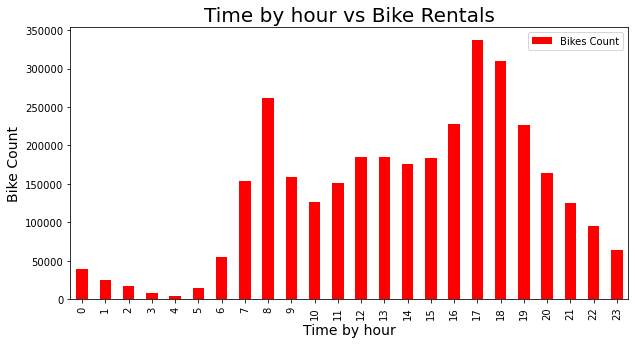

In [50]:
Bike_Hour_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Time by hour",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Time by hour vs Bike Rentals",fontsize = 20)
#plt.savefig('Output/barplot_pandas.png', bbox_inches = "tight")
plt.show()

# Weather patterns vs Bike Rentals

In [ ]:
#Amber

# Seasons vs Bike Rentals

In [56]:
Bike_Share_Season=Bike_Share_Hour.copy()
bins=[0,1,2,3,4]
group=['Spring','Summer','Fall','Winter']
Bike_Share_Season['Season Name']=pd.cut(Bike_Share_Season['season'],bins,labels=group,include_lowest=True)
Bike_Share_Season.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season Name
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Spring


In [83]:
Bike_Season_Count=Bike_Share_Season.groupby(Bike_Share_Season['Season Name']).sum()['cnt']
Bike_Season_Count_df=pd.DataFrame({'Bike Count':Bike_Season_Count})
#For TTest
Bike_df=Bike_Share_Season.groupby(Bike_Share_Season['season']).sum()['cnt']
Bike_df=pd.DataFrame({'Bike Count':Bike_df})
Bike_df=Bike_df.reset_index()
Bike_df

,season,Bike Count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [74]:
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].min()]

,Bike Count
Season Name,
Spring,471348


In [75]:
Bike_Season_Count_df.loc[Bike_Season_Count_df['Bike Count']==Bike_Season_Count_df['Bike Count'].max()]

,Bike Count
Season Name,
Fall,1061129


# Bar chart

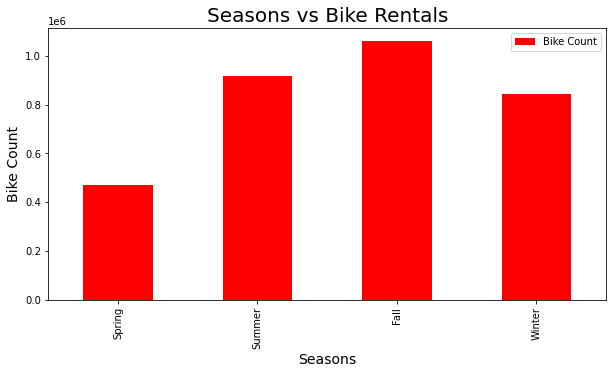

In [76]:
Bike_Season_Count_df.plot.bar(figsize=(10,5), color='r',fontsize = 10)
plt.xlabel("Seasons",fontsize = 14)
plt.ylabel("Bike Count",fontsize = 14)
plt.title("Seasons vs Bike Rentals",fontsize = 20)
#plt.savefig('Output/barplot_pandas.png', bbox_inches = "tight")
plt.show()

In [84]:
#TTest
st.ttest_ind(Bike_df['season'],Bike_df['Bike Count'],equal_var=False)

Ttest_indResult(statistic=-6.544485936508665, pvalue=0.007252602616026272)

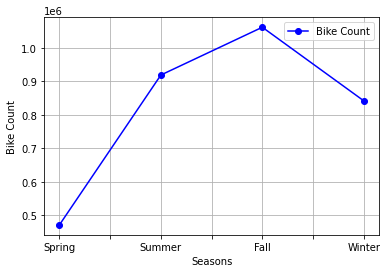

In [61]:
#x_axis=Bike_Season_Count_df['season']
#y_axis=Bike_Season_Count_df['Bike Count']
Bike_Season_Count_df.plot(marker="o",color="blue")
#plt.title('Capomulin treatment for s185')
plt.xlabel('Seasons')
plt.ylabel('Bike Count')
plt.grid()
#plt.savefig('Output/Capomulin_treatment_s185.png', bbox_inches = "tight")
plt.show()

# Weekday versus Weekend  Bike Rentals

In [ ]:
#Aurelian

# Holiday vs Bike Rentals

In [ ]:
#Aurelian